In [1]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from hdbscan import HDBSCAN
from umap import UMAP

In [2]:
file_path = "mnist_test.csv"
df = pd.read_csv(file_path)
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB


In [4]:
df = df.drop('label',axis=1)
df = df.dropna()

In [5]:
X = StandardScaler().fit_transform(df)

In [6]:
reducer = UMAP(n_neighbors = 30,min_dist = 0.25,n_components=2,random_state=42)
embedding = reducer.fit_transform(X)

c:\Users\Saket Rama\AppData\Local\Programs\Python\Python313\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [7]:
hdbs = HDBSCAN(min_samples=60,min_cluster_size=60,metric='euclidean')

In [8]:
df['cluster'] = hdbs.fit_predict(embedding)

In [9]:
df['cluster'].value_counts()

cluster
 2    3648
 0    2900
 1    1166
 4     986
 3     770
-1     530
Name: count, dtype: int64

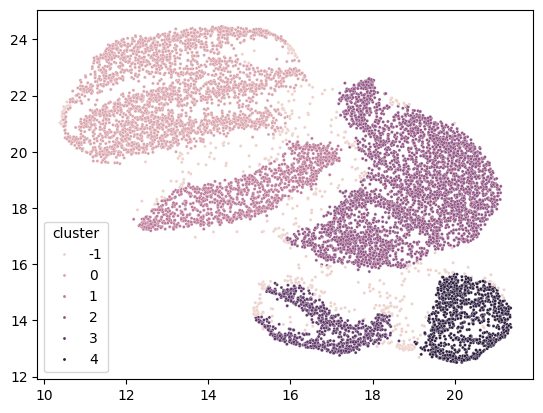

In [12]:
sns.scatterplot(x=embedding[:,0],y=embedding[:,1],hue=df['cluster'],s=5)
plt.show()